In [1]:
import pandas as pd
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Intensity/CSV/Optical_Mag.csv',index_col=0)
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Class
0,372.92203,362.69130,350.63812,210.87730,214.75081,164.38365,212.35160,251.46540,312.61560,205.60248,...,288.037230,410.070100,441.603550,379.87680,1398.7834,278.7160,301.12616,239.117050,477.266100,0
1,240.19547,240.12958,256.62112,252.72621,170.48306,281.75586,174.03131,173.71799,255.81352,238.56960,...,435.283140,518.044900,914.143000,449.55862,2467.9111,4137.2305,3146.77100,2503.685000,910.993200,0
2,1517.87350,1229.62510,1227.23520,1408.06520,1701.61070,1425.35190,1373.96680,1437.91490,1633.49540,1862.82590,...,1676.284000,1532.106100,1503.260300,1570.20980,1742.7628,1926.9270,1565.97330,1381.225200,1356.190700,0
3,2443.07370,3847.75660,10229.55900,3523.68070,6001.05300,8588.63600,15606.87600,9383.27000,9314.14100,4888.85500,...,2.965529,2.965872,2.965872,1.35458,3908.4420,161.7076,52.62399,2.952988,3.275134,0
4,9062.74100,11081.28700,10685.92400,8698.27100,5733.89840,8995.76600,8062.09960,9380.41000,5809.62940,5657.07900,...,52994.870000,59666.290000,20668.380000,10549.26400,3290.1765,5431.4650,9030.68750,10763.368000,9192.955000,0


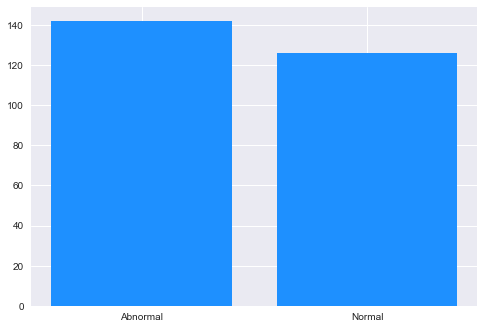

In [4]:

import warnings
warnings.filterwarnings("ignore")
 
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix
from sklearn import metrics
num_normal = np.sum(d['Class'] == 0)
num_abnormal = np.sum(d['Class'] == 1)
plt.bar(['Abnormal', 'Normal'], [num_abnormal, num_normal], color='dodgerblue')
plt.show()

In [5]:
# 提取负样本，并且按照8:2切成训练集和测试集
data = d
mask = (data['Class'] == 0)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)

X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)


X_fraud = data[~mask].drop(['Class'], axis=1)
std=MinMaxScaler()
X_train=std.fit_transform(X_train)
X_fraud=std.transform(X_fraud)
X_test=std.transform(X_test)


In [6]:

# 设置Autoencoder的参数
# 隐藏层节点数分别为16，8，8，16
# epoch为50，batch size为32
input_dim = X_train.shape[1]
encoding_dim = 4
num_epoch = 1300
batch_size = 64

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])

# 模型保存为SofaSofa_model.h5，并开始训练模型
checkpointer = ModelCheckpoint(filepath="Optical.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train, X_train,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1, 
                          callbacks=[checkpointer]).history



Epoch 1/1300


InternalError:  Blas GEMM launch failed : a.shape=(64, 27), b.shape=(27, 4), m=64, n=4, k=27
	 [[node functional_1/dense/MatMul (defined at <ipython-input-6-70980462b067>:24) ]] [Op:__inference_train_function_864]

Function call stack:
train_function
